# ML Model Deployment with FastAPI and Heroku 

**Census project:** Predict whether income exceeds $50K/yr based on census data. Also known as Adult dataset.

Data has been downloaded from: https://github.com/udacity/nd0821-c3-starter-code/tree/master/starter/data

Information on the dataset can be found here: https://archive.ics.uci.edu/dataset/20/census+income

## This deployment contains the following Jupyter notebooks:
* **Load, explore and clean a dataset.** (performed in this notebook)
* Tests with API
* Tests with Heroku


## Load, explore and clean dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_6712/555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Read original data
df = pd.read_csv('./data/census.csv')

## Receive detailed information about the dataset 

In [3]:
# Number of data rows, number of features
df.shape

(32561, 15)

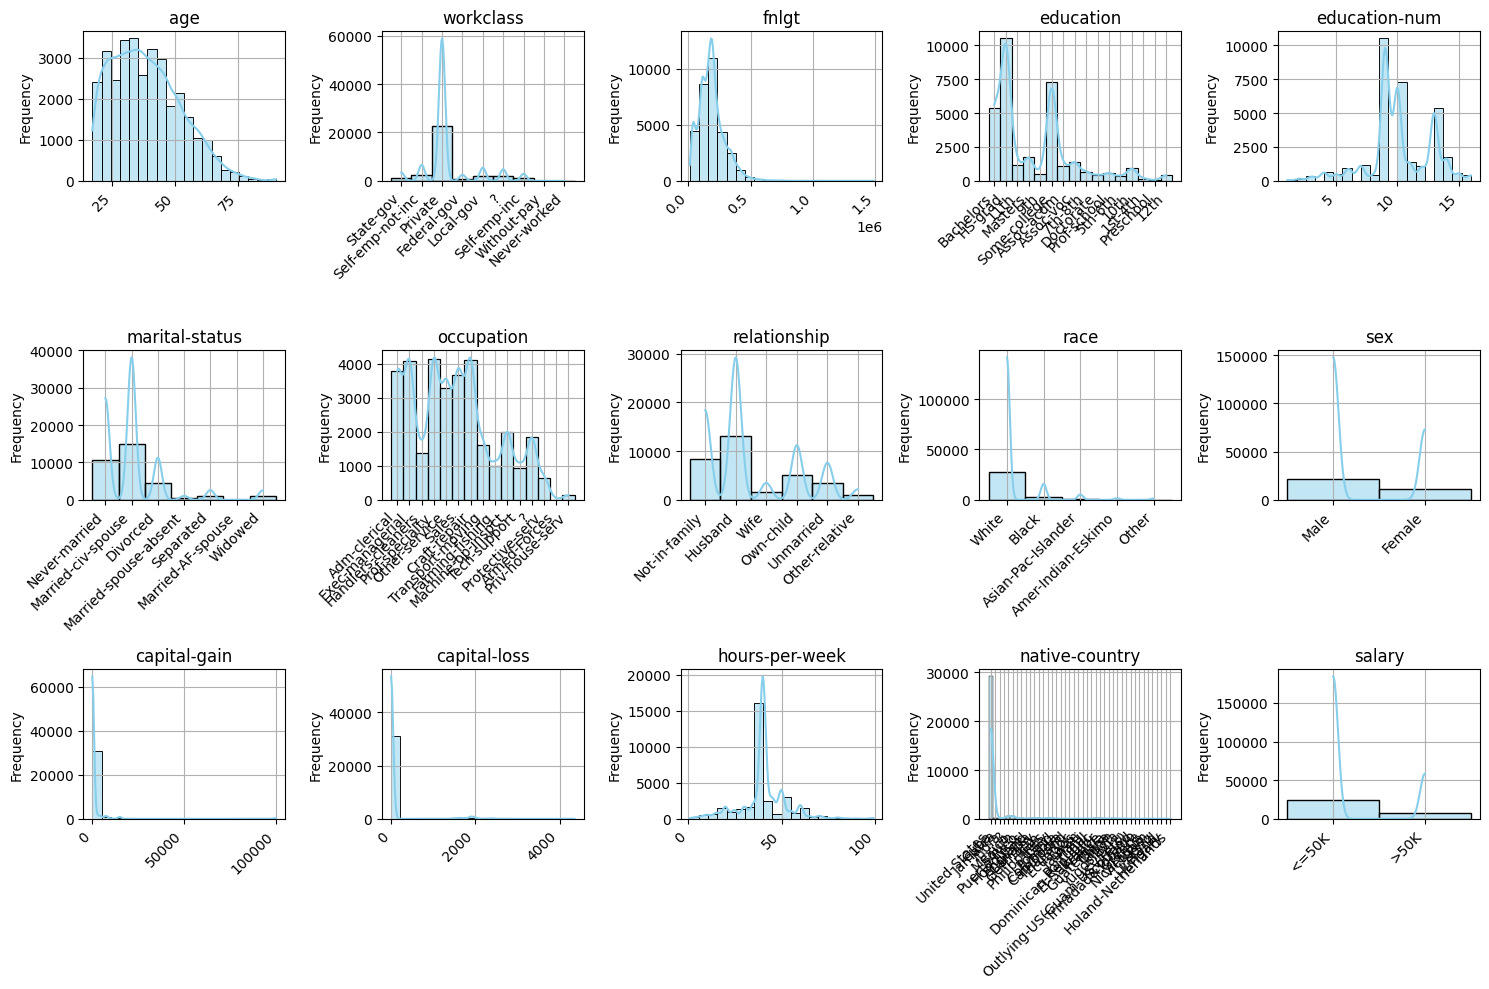

In [4]:
# Plot the data
# The dataset has 15 features, due to the information above
# Let's adjust the figsize accordingly and receive an overview of the data
plt.figure(figsize=(15, 10))

# Loop through each feature and create a subplot for its distribution
for i, col in enumerate(df.columns):
    plt.subplot(3, 5, i+1)  # 3 rows, 5 columns
    sns.histplot(df[col], kde=True, color='skyblue', bins=20)  # Adjust bins
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.grid(True)
    # Customize x-axis ticks to show feature names
    plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment

plt.tight_layout()
plt.show()


In [5]:
df.describe()

,age,fnlgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# Show first data rows
df.head()

,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Cleaning data

In [7]:
# The data may contain spaces
# Strip leading and trailing spaces from all columns
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

In [8]:
# Save control data
# output_path = 'data/census_no_spaces.csv'
# df.to_csv(output_path, index=False)

In [9]:
# Let's look at more samples
# Show random number of rows
num_rows = np.random.randint(1, len(df))
random_subset = df.sample(n=5)
random_subset

,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
23103,48,Local-gov,144122,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,>50K
14991,39,Self-emp-inc,336226,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,3103,0,60,United-States,>50K
22211,22,Private,192017,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
25217,45,Local-gov,160187,HS-grad,9,Married-spouse-absent,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K
27225,58,?,150031,Some-college,10,Never-married,?,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [10]:
# Check column names
df.columns

Index(['age', 'workclass', 'fnlgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [11]:
# Remove spaces from column names and also replace hyphen with underscore
# df.columns = df.columns.str.replace(" ", "")
df = df.rename(columns={col_name: col_name.replace(' ', '') for col_name in df.columns})
df = df.rename(columns={col_name: col_name.replace('-', '_') for col_name in df.columns})
df.columns

Index(['age', 'workclass', 'fnlgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [12]:
# Note: Replacing question marks with pd.NA casued problems when using OneHotEncoder
# Save control data
# output_path = 'data/census_fixed_column_names.csv'
# df.to_csv(output_path, index=False)

In [13]:
# Display rows containing question marks
# rows_with_question_marks = df[df.apply(lambda row: row.astype(str).str.contains('\\?').any(), axis=1)]
# print(rows_with_question_marks)

In [14]:
# Print number of rows with missing data or question marks
# df_cleaned = df.replace('?', pd.NA)
# rows_with_missing_data_or_question_marks = df_cleaned.isnull().any(axis=1).sum()
# print("Number of rows to be amended:", rows_with_missing_data_or_question_marks)

In [15]:
# Check if the above works and if missing data and question marks have been replaced by NA
# rows_with_question_marks = df_cleaned[df.apply(lambda row: row.astype(str).str.contains('\\?').any(), axis=1)]
# print(rows_with_question_marks)

# Apply changes to dataframe
# df = df.replace('?', pd.NA)

# Note: Do not replace question marks when e.g. categorical features are one-hot encoded using OneHotEncoder. 
# Depending on how OneHotEncoder handles missing values, the presence of pd.NA might lead to errors during encoding.

In [16]:
# Save control data
# output_path = 'data/census_removed_questionmarks.csv'
# df.to_csv(output_path, index=False)

## Filter categorical and numerical columns:

In [17]:
# numColumn = list(df.select_dtypes(include = ['float', 'int']))
catColumns = df.select_dtypes(include='object').columns.tolist()
numColumns = df.select_dtypes(exclude='object').columns.tolist()

In [18]:
catColumns

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'salary']

In [19]:
numColumns

['age',
 'fnlgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [20]:
# Drop duplicates
df = df.drop_duplicates().reset_index(drop=True)

## Salary value range

In [21]:
# Check value range
df.salary.unique()

array(['<=50K', '>50K'], dtype=object)

In [22]:
df.salary.value_counts()

salary
<=50K    24698
>50K      7839
Name: count, dtype: int64

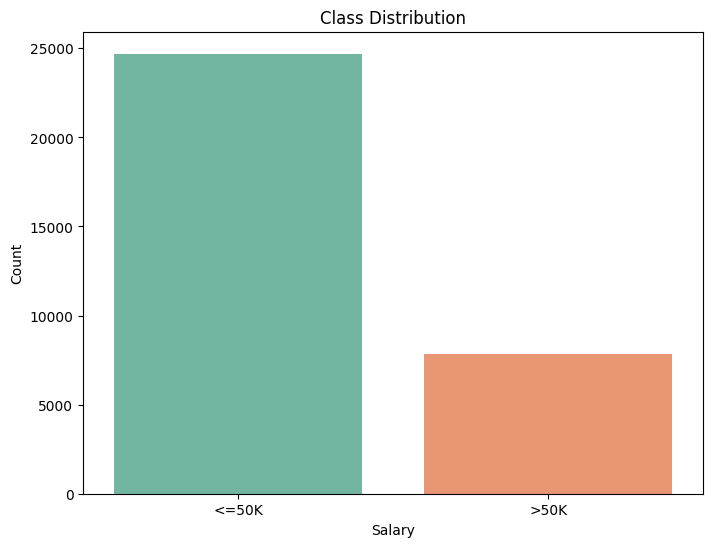

In [23]:
# Dataset target column 'salary'
class_counts = df['salary'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, palette='Set2', legend=False)
plt.title('Class Distribution')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

## Save cleaned data

In [24]:
# Save clean data to new file
output_path = 'data/census_clean.csv'
df.to_csv(output_path, index=False)